In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [3]:
import warnings 
warnings.filterwarnings('ignore')


In [4]:
df=pd.read_csv('indian_liver_patients.csv')

In [5]:
df.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Label
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


# Analyze the data


In [6]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Label
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [7]:
df.columns


Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Label'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Label                       583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [9]:
df.isnull()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Label
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
578,False,False,False,False,False,False,False,False,False,False,False
579,False,False,False,False,False,False,False,False,False,False,False
580,False,False,False,False,False,False,False,False,False,False,False
581,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.shape

(583, 11)

In [11]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Label                         0
dtype: int64

In [12]:
Correlation=df.corr()

In [13]:
Correlation

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Label
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,-0.137351
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,-0.220208
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,-0.246046
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,-0.184866
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,-0.163416
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,-0.151934
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,0.035008
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,0.161388
Albumin_and_Globulin_Ratio,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,0.163131
Label,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,0.163131,1.000000


Text(0.5, 1.0, 'Correlation between all the features')

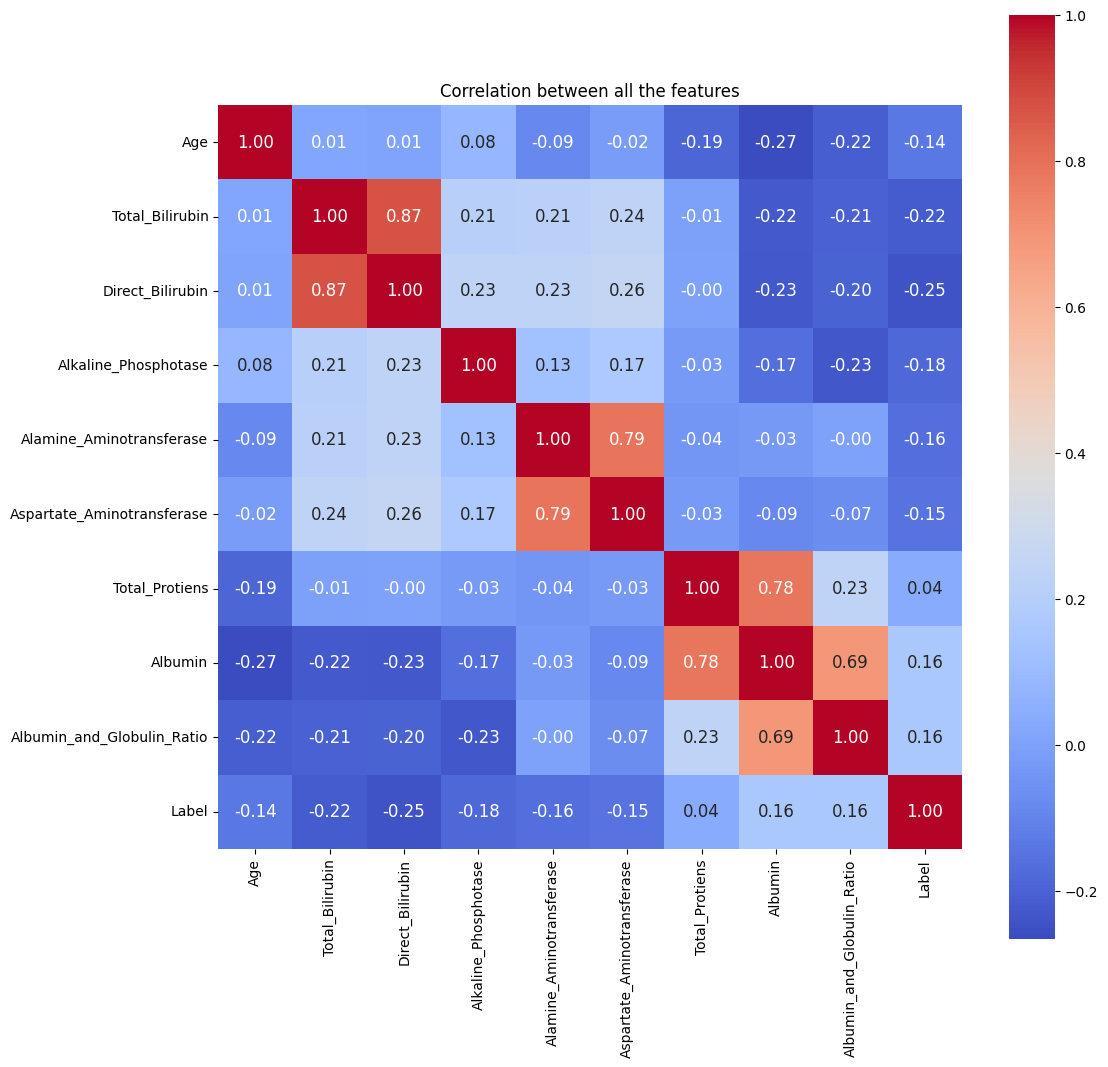

In [14]:
plt.figure(figsize=(12,12))
sns.heatmap(Correlation , cbar = True,  square = True, annot=True, fmt= '.2f', annot_kws={'size': 12}, cmap= 'coolwarm')
plt.title('Correlation between all the features')

# Visualize

In [15]:
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

Number of patients diagnosed with liver disease:  416
Number of patients not diagnosed with liver disease:  167


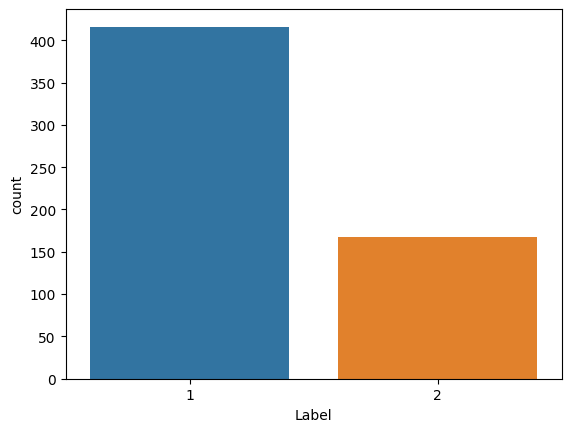

In [16]:
sns.countplot(data=df, x = 'Label', label='Count')

LD, NLD = df['Label'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

Number of patients that are male:  441
Number of patients that are female:  142


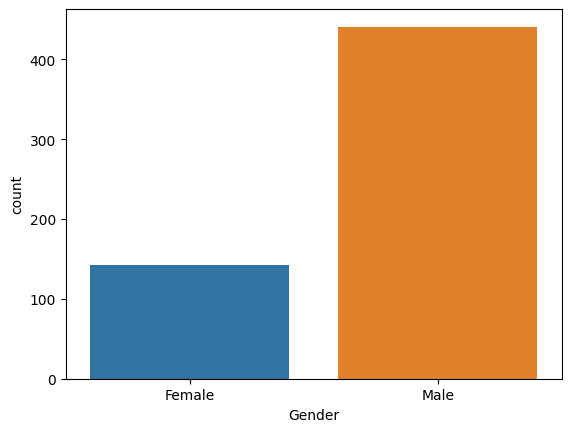

In [17]:
sns.countplot(data=df, x = 'Gender', label='Count')

Male, Female = df['Gender'].value_counts()
print('Number of patients that are male: ',Male)
print('Number of patients that are female: ',Female)

Text(0.5, 0.98, 'Disease by Gender and Age')

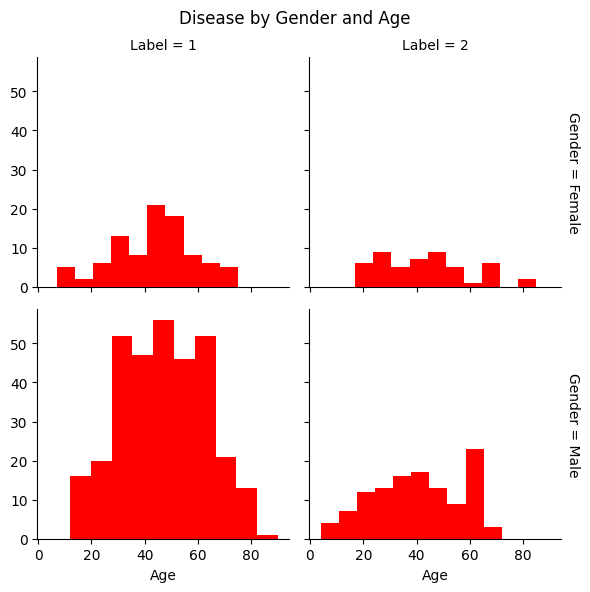

In [18]:
a = sns.FacetGrid(df, col="Label", row="Gender", margin_titles=True)
a.map(plt.hist, "Age", color="red")
plt.subplots_adjust(top=0.9)
a.fig.suptitle('Disease by Gender and Age')


In [19]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Label
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


<AxesSubplot: xlabel='Total_Bilirubin', ylabel='Density'>

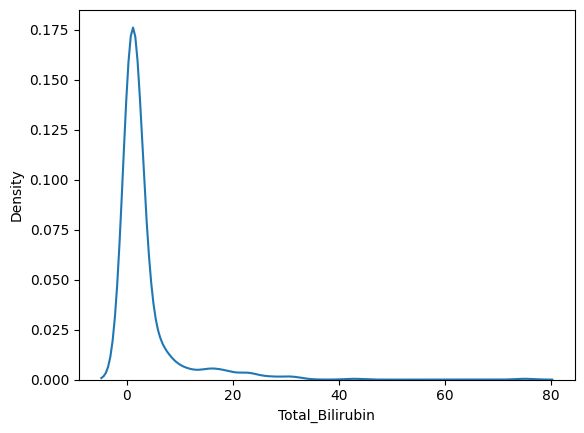

In [20]:
sns.kdeplot(df['Total_Bilirubin'])


<AxesSubplot: xlabel='Direct_Bilirubin', ylabel='Density'>

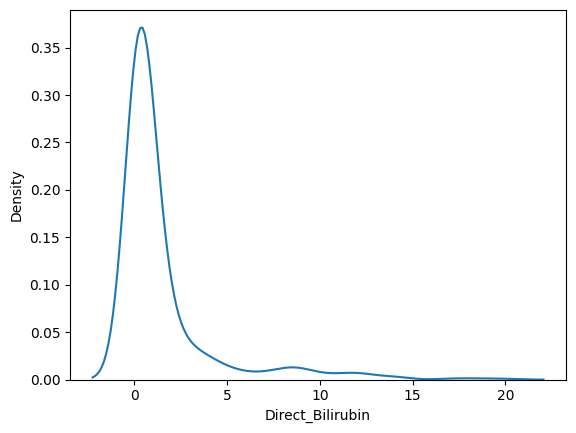

In [21]:
sns.kdeplot(df['Direct_Bilirubin'])


<AxesSubplot: xlabel='Alkaline_Phosphotase', ylabel='Density'>

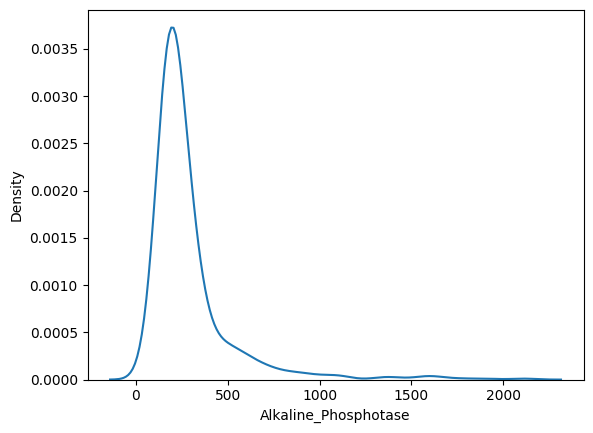

In [22]:
sns.kdeplot(df['Alkaline_Phosphotase'])

<AxesSubplot: xlabel='Total_Protiens', ylabel='Density'>

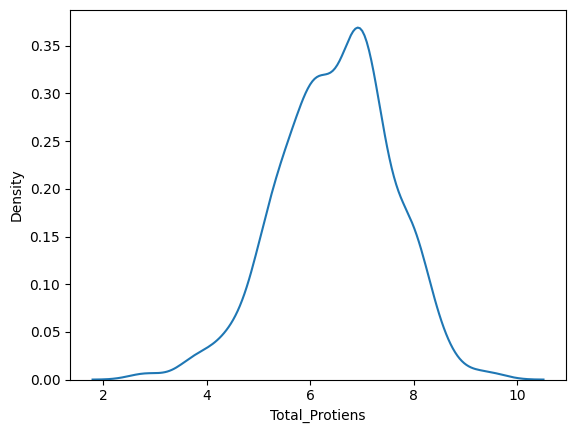

In [23]:
sns.kdeplot(df['Total_Protiens'])

<AxesSubplot: xlabel='Alamine_Aminotransferase', ylabel='Density'>

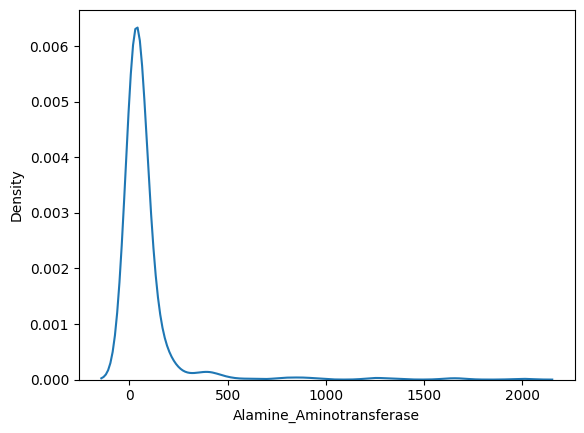

In [24]:
sns.kdeplot(df['Alamine_Aminotransferase'])

<AxesSubplot: xlabel='Albumin_and_Globulin_Ratio', ylabel='Density'>

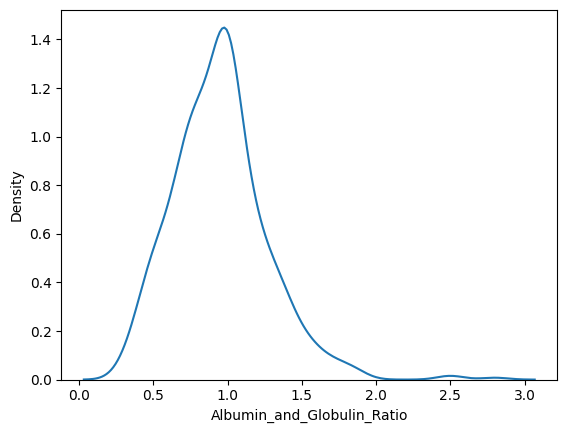

In [25]:
sns.kdeplot(df['Albumin_and_Globulin_Ratio'])

<AxesSubplot: xlabel='Albumin', ylabel='Density'>

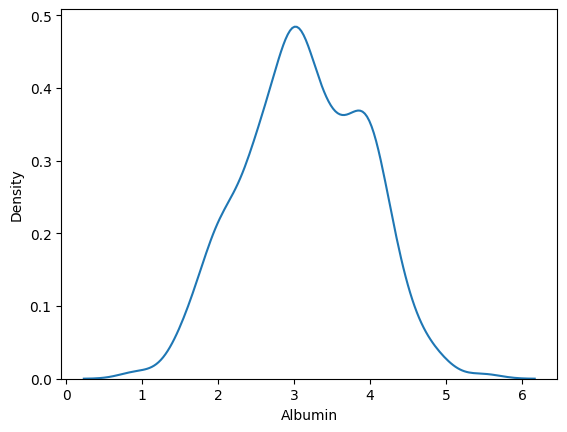

In [26]:
sns.kdeplot(df['Albumin'])

# Curate the data (if required)

In [27]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Label                         0
dtype: int64

In [28]:
df[df['Albumin_and_Globulin_Ratio'].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Label
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [29]:
df["Albumin_and_Globulin_Ratio"] = df.Albumin_and_Globulin_Ratio.fillna(df['Albumin_and_Globulin_Ratio'].mean())


In [30]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Label                         0
dtype: int64

# Build a disease classifier using:

In [31]:
X = df.drop(['Gender','Label'], axis=1)
y = df['Label']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)




(390, 9)
(390,)
(193, 9)
(193,)


# A. Logistic Regression

In [33]:
lr = LogisticRegression()

# Train the model using the training sets and check score
lr.fit(X_train, y_train)

# Predict Output
l_predicted= lr.predict(X_test)

lr_score = round(lr.score(X_train, y_train) * 100, 2)
lr_score_test = round(lr.score(X_test, y_test) * 100, 2)

# Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', lr_score)
print('Logistic Regression Test Score: \n', lr_score_test)

print('Accuracy: \n', accuracy_score(y_test,l_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,l_predicted))


Logistic Regression Training Score: 
 71.28
Logistic Regression Test Score: 
 73.58
Accuracy: 
 0.7357512953367875
Confusion Matrix: 
 [[134   7]
 [ 44   8]]


In [34]:
print('Classification Report: \n', classification_report(y_test,l_predicted))

Classification Report: 
               precision    recall  f1-score   support

           1       0.75      0.95      0.84       141
           2       0.53      0.15      0.24        52

    accuracy                           0.74       193
   macro avg       0.64      0.55      0.54       193
weighted avg       0.69      0.74      0.68       193



<AxesSubplot: >

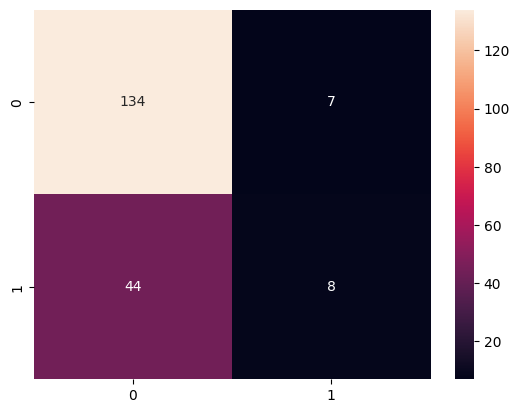

In [35]:
sns.heatmap(confusion_matrix(y_test,l_predicted),annot=True,fmt="d")

# B.Random Forest

In [36]:
r_f = RandomForestClassifier()  #n_estimators=100
r_f.fit(X_train, y_train)
# Predict Output
rf_predicted = r_f.predict(X_test)

r_f_score = round(r_f.score(X_train, y_train) * 100, 2)
r_f_score_test = round(r_f.score(X_test, y_test) * 100, 2)
print('Random Forest Score: \n', r_f_score)
print('Random Forest Test Score: \n', r_f_score_test)
print('Accuracy: \n', accuracy_score(y_test,rf_predicted))
print(confusion_matrix(y_test,rf_predicted))
print(classification_report(y_test,rf_predicted))

Random Forest Score: 
 100.0
Random Forest Test Score: 
 72.54
Accuracy: 
 0.7253886010362695
[[122  19]
 [ 34  18]]
              precision    recall  f1-score   support

           1       0.78      0.87      0.82       141
           2       0.49      0.35      0.40        52

    accuracy                           0.73       193
   macro avg       0.63      0.61      0.61       193
weighted avg       0.70      0.73      0.71       193



<AxesSubplot: >

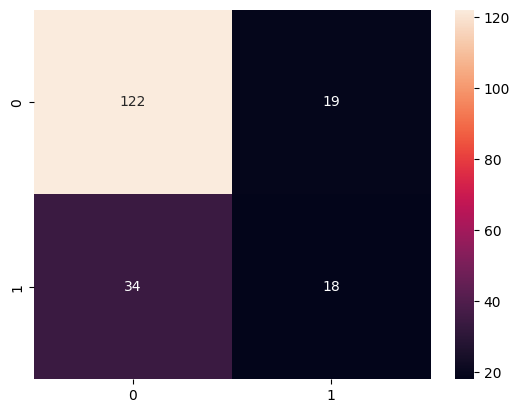

In [37]:
sns.heatmap(confusion_matrix(y_test,rf_predicted),annot=True,fmt="d")

# C. Gaussian Naive Bayes

In [38]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
# Predict Output
gauss_predicted = gaussian.predict(X_test)

gauss_score = round(gaussian.score(X_train, y_train) * 100, 2)
gauss_score_test = round(gaussian.score(X_test, y_test) * 100, 2)
print('Gaussian Score: \n', gauss_score)
print('Gaussian Test Score: \n', gauss_score_test)
print('Accuracy: \n', accuracy_score(y_test, gauss_predicted))
print(confusion_matrix(y_test,gauss_predicted))
print(classification_report(y_test,gauss_predicted))



Gaussian Score: 
 53.08
Gaussian Test Score: 
 57.51
Accuracy: 
 0.5751295336787565
[[60 81]
 [ 1 51]]
              precision    recall  f1-score   support

           1       0.98      0.43      0.59       141
           2       0.39      0.98      0.55        52

    accuracy                           0.58       193
   macro avg       0.68      0.70      0.57       193
weighted avg       0.82      0.58      0.58       193



<AxesSubplot: >

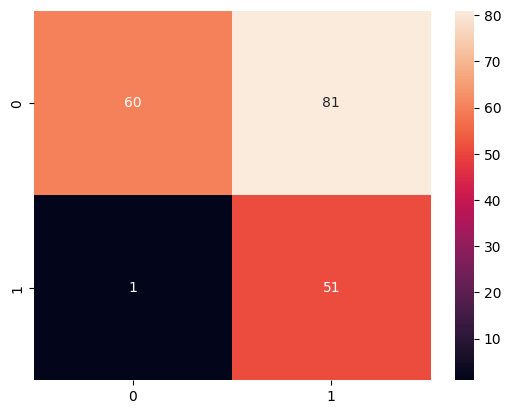

In [39]:
sns.heatmap(confusion_matrix(y_test, gauss_predicted),annot=True,fmt="d")

# D. Decision Tree

In [40]:
clf=DecisionTreeClassifier()
                           

In [41]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [42]:
clf.fit(X_train,y_train)
clf.predict(X_test)

fig=plt.figure(figsize=(20,20), dpi=600)
plot_tree(clf,feature_names=X_train.columns,filled=True);
fig.savefig("tree2.png")

In [43]:
predictions=clf.predict(X_test)
confusion_matrix(y_test, predictions)


array([[117,  24],
       [ 26,  26]], dtype=int64)

In [44]:
print('Accuracy: \n', accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

Accuracy: 
 0.7409326424870466
              precision    recall  f1-score   support

           1       0.82      0.83      0.82       141
           2       0.52      0.50      0.51        52

    accuracy                           0.74       193
   macro avg       0.67      0.66      0.67       193
weighted avg       0.74      0.74      0.74       193



<AxesSubplot: >

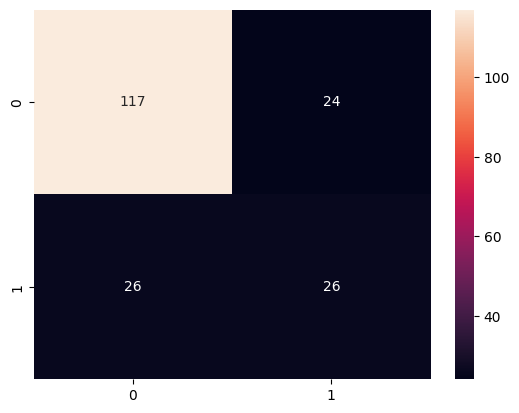

In [45]:
sns.heatmap(confusion_matrix(y_test, predictions),annot=True,fmt="d")

# E.Gradient Boost



In [46]:
from sklearn.ensemble import GradientBoostingClassifier

In [47]:
gbm_clf = GradientBoostingClassifier().fit(X_train, y_train)

gbm_pred = gbm_clf.predict(X_test)


print('Accuracy: \n', accuracy_score(y_test,gbm_pred))
print(classification_report(y_test,gbm_pred))

Accuracy: 
 0.7202072538860104
              precision    recall  f1-score   support

           1       0.78      0.86      0.82       141
           2       0.47      0.35      0.40        52

    accuracy                           0.72       193
   macro avg       0.63      0.60      0.61       193
weighted avg       0.70      0.72      0.71       193



In [48]:
confusion_matrix(y_test,gbm_pred)

array([[121,  20],
       [ 34,  18]], dtype=int64)

<AxesSubplot: >

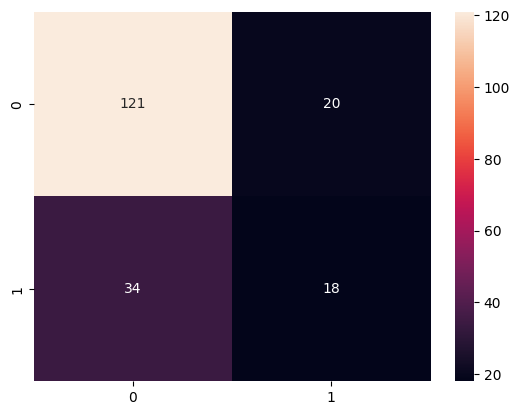

In [49]:
sns.heatmap(confusion_matrix(y_test,gbm_pred),annot=True,fmt="d")

# F.XGB

In [50]:
from xgboost import XGBClassifier

In [51]:
xgb_clf = XGBClassifier()

xgb_clf.fit(X_train,y_train)
xgb_pred = xgb_clf.predict(X_test)
print('Accuracy: \n', accuracy_score(y_test,xgb_pred))
print(classification_report(y_test,xgb_pred))


Accuracy: 
 0.689119170984456
              precision    recall  f1-score   support

           1       0.75      0.86      0.80       141
           2       0.38      0.23      0.29        52

    accuracy                           0.69       193
   macro avg       0.56      0.54      0.54       193
weighted avg       0.65      0.69      0.66       193



In [52]:
confusion_matrix(y_test,xgb_pred)

array([[121,  20],
       [ 40,  12]], dtype=int64)

<AxesSubplot: >

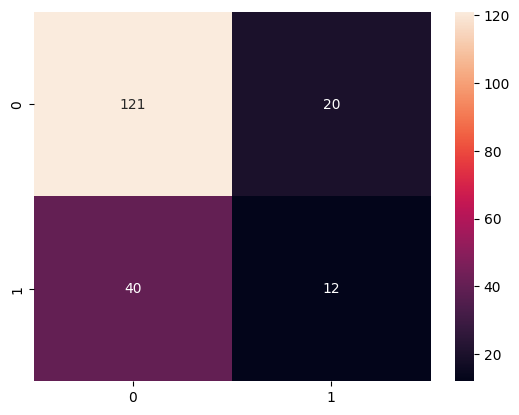

In [53]:
sns.heatmap(confusion_matrix(y_test,xgb_pred),annot=True,fmt="d")

# G. SVM

In [117]:
from sklearn import svm
svm_clf = svm.SVC() 
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)

In [118]:
print('Accuracy: \n', accuracy_score(y_test,svm_pred))
print(classification_report(y_test,svm_pred))


Accuracy: 
 0.7305699481865285
              precision    recall  f1-score   support

           1       0.73      1.00      0.84       141
           2       0.00      0.00      0.00        52

    accuracy                           0.73       193
   macro avg       0.37      0.50      0.42       193
weighted avg       0.53      0.73      0.62       193



In [119]:
confusion_matrix(y_test,svm_pred)


array([[141,   0],
       [ 52,   0]], dtype=int64)

<AxesSubplot: >

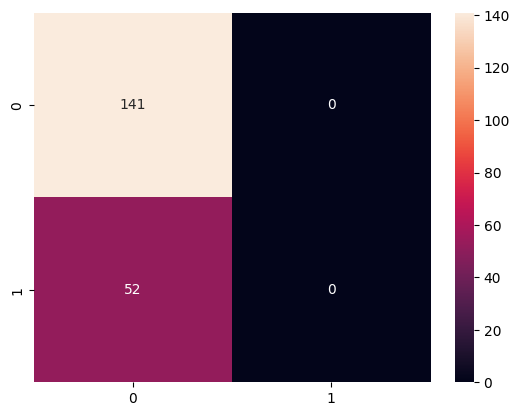

In [57]:
sns.heatmap(confusion_matrix(y_test,svm_pred),annot=True,fmt="d")

# USING HYPERPARAMETERS

# 1.Logistic Regression

In [58]:
#Normalization and Resampling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [102]:
lr1 = LogisticRegression(C = 0.1, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='auto', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


# Train the model using the training sets and check score
lr1.fit(X_train, y_train)

# Predict Output
l1_predicted= lr1.predict(X_test)



print('Accuracy: \n', accuracy_score(y_test,l1_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,l1_predicted))
print('Classification Report: \n', classification_report(y_test,l1_predicted))


Accuracy: 
 0.7305699481865285
Confusion Matrix: 
 [[141   0]
 [ 52   0]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.73      1.00      0.84       141
           2       0.00      0.00      0.00        52

    accuracy                           0.73       193
   macro avg       0.37      0.50      0.42       193
weighted avg       0.53      0.73      0.62       193



# 2.RandomForest

In [60]:
r_f1 = RandomForestClassifier(n_estimators=100)  
r_f1.fit(X_train, y_train)
# Predict Output
rf_predicted1 = r_f1.predict(X_test)


print('Accuracy: \n', accuracy_score(y_test,rf_predicted1))
print(confusion_matrix(y_test,rf_predicted1))
print(classification_report(y_test,rf_predicted1))

Accuracy: 
 0.7150259067357513
[[121  20]
 [ 35  17]]
              precision    recall  f1-score   support

           1       0.78      0.86      0.81       141
           2       0.46      0.33      0.38        52

    accuracy                           0.72       193
   macro avg       0.62      0.59      0.60       193
weighted avg       0.69      0.72      0.70       193



# 3.Guassian NB

In [61]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
# Predict Output
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
from sklearn.model_selection import GridSearchCV
nbModel_grid = GridSearchCV(estimator= gaussian , param_grid=param_grid_nb, verbose=1, cv=5, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=1.0)


In [62]:
y_predictio = nbModel_grid.predict(X_test)

In [63]:

print(confusion_matrix(y_test, y_predictio), ": is the confusion matrix")

print(accuracy_score(y_test, y_predictio), ": is the accuracy score")
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
...
print(precision_score(y_test,y_predictio), ": is the precision score")

print(recall_score(y_test,y_predictio), ": is the recall score")

print(f1_score(y_test, y_predictio), ": is the f1 score")

[[113  28]
 [ 32  20]] : is the confusion matrix
0.689119170984456 : is the accuracy score
0.7793103448275862 : is the precision score
0.8014184397163121 : is the recall score
0.7902097902097902 : is the f1 score


# #4.DecisionTree

In [64]:
clf1=DecisionTreeClassifier(criterion='gini',max_depth=2)
clf1.fit(X_train,y_train)
clf1.predict(X_test)
predictions1=clf1.predict(X_test)
confusion_matrix(y_test, predictions1)



array([[141,   0],
       [ 51,   1]], dtype=int64)

In [65]:
print('Accuracy: \n', accuracy_score(y_test,predictions1))
print(classification_report(y_test,predictions1))

Accuracy: 
 0.7357512953367875
              precision    recall  f1-score   support

           1       0.73      1.00      0.85       141
           2       1.00      0.02      0.04        52

    accuracy                           0.74       193
   macro avg       0.87      0.51      0.44       193
weighted avg       0.81      0.74      0.63       193



# 5 Gradient Boosting

In [66]:
gbm_clf1 = GradientBoostingClassifier(learning_rate=0.01).fit(X_train, y_train)

gbm_pred1 = gbm_clf1.predict(X_test)


print('Accuracy: \n', accuracy_score(y_test,gbm_pred1))
print(classification_report(y_test,gbm_pred1))



Accuracy: 
 0.7461139896373057
              precision    recall  f1-score   support

           1       0.74      1.00      0.85       141
           2       1.00      0.06      0.11        52

    accuracy                           0.75       193
   macro avg       0.87      0.53      0.48       193
weighted avg       0.81      0.75      0.65       193



In [67]:
confusion_matrix(y_test,gbm_pred1)

array([[141,   0],
       [ 49,   3]], dtype=int64)

# 6 SVM

In [79]:
confusion_matrix(y_test,svm_pred)


array([[141,   0],
       [ 52,   0]], dtype=int64)

In [104]:
from sklearn import svm
svm_clf1 = svm.SVC(kernel='poly',C=5)
svm_clf1.fit(X_train, y_train)
svm_pred1 = svm_clf1.predict(X_test)
print('Accuracy: \n', accuracy_score(y_test,svm_pred1))
print(classification_report(y_test,svm_pred1))


Accuracy: 
 0.7046632124352331
              precision    recall  f1-score   support

           1       0.72      0.96      0.83       141
           2       0.00      0.00      0.00        52

    accuracy                           0.70       193
   macro avg       0.36      0.48      0.41       193
weighted avg       0.53      0.70      0.60       193



In [101]:
confusion_matrix(y_test,svm_pred1)

array([[141,   0],
       [ 52,   0]], dtype=int64)

# 7 XGBOOST

In [123]:
xgb_clf = XGBClassifier(n_estimators=100,learning_rate=0.02)

xgb_clf.fit(X_train,y_train)
xgb_pred = xgb_clf.predict(X_test)
print('Accuracy: \n', accuracy_score(y_test,xgb_pred))
print(classification_report(y_test,xgb_pred))


Accuracy: 
 0.7150259067357513
              precision    recall  f1-score   support

           1       0.76      0.89      0.82       141
           2       0.45      0.25      0.32        52

    accuracy                           0.72       193
   macro avg       0.61      0.57      0.57       193
weighted avg       0.68      0.72      0.69       193



In [124]:
confusion_matrix(y_test,xgb_pred)

array([[125,  16],
       [ 39,  13]], dtype=int64)